# **Setup**

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [4]:
classes = os.listdir('C:/Users/REKHA/Desktop/Mini Project NFCD/Brain Tumor Detection and Classification/DataSet/Training')

In [5]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]


# **Data Split**

In [7]:
trainData = []
trainLabel = []
dim = (150, 150)
trainPath = "C:/Users/REKHA/Desktop/Mini Project NFCD/Brain Tumor Detection and Classification/DataSet/Training"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(2870, 4)
print(trainData.shape)
print(trainLabel.shape)

glioma_tumor
glioma_tumor
meningioma_tumor
meningioma_tumor
no_tumor
no_tumor
pituitary_tumor
pituitary_tumor
(2870, 150, 150, 3)
(2870, 4)


In [11]:
testData = []
testLabel = []
dim = (150, 150)
testPath = "C:/Users/REKHA/Desktop/Mini Project NFCD/Brain Tumor Detection and Classification/DataSet/Testing"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(394, 4)
print(testData.shape)
print(testLabel.shape)

glioma_tumor
glioma_tumor
meningioma_tumor
meningioma_tumor
no_tumor
no_tumor
pituitary_tumor
pituitary_tumor
(394, 150, 150, 3)
(394, 4)


# **Building the Model**

In [14]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 40
batch_size = 40
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  

In [16]:
# Data augmentation setup
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False
)
# Fit the data generator on the training data
datagen.fit(trainData)  # Only necessary if you're using raw data like NumPy arrays
# Train the model using the new 'fit' method
history = model.fit(datagen.flow(trainData, trainLabel, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(testData, testLabel),
                    steps_per_epoch=trainData.shape[0] // batch_size)


Epoch 1/40


C:\Users\REKHA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 57s 753ms/step - accuracy: 0.3216 - loss: 33.2010 - val_accuracy: 0.2690 - val_loss: 1.5435
Epoch 2/40
 1/71 ━━━━━━━━━━━━━━━━━━━━ 53s 766ms/step - accuracy: 0.4250 - loss: 1.3056

C:\Users\REKHA\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4250 - loss: 1.3056 - val_accuracy: 0.2563 - val_loss: 1.5466
Epoch 3/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 59s 829ms/step - accuracy: 0.5054 - loss: 1.0950 - val_accuracy: 0.3020 - val_loss: 1.5852
Epoch 4/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5500 - loss: 1.1628 - val_accuracy: 0.3020 - val_loss: 1.5408
Epoch 5/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 59s 826ms/step - accuracy: 0.5922 - loss: 0.9257 - val_accuracy: 0.3401 - val_loss: 1.4871
Epoch 6/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6000 - loss: 0.8813 - val_accuracy: 0.3503 - val_loss: 1.4770
Epoch 7/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 56s 784ms/step - accuracy: 0.6367 - loss: 0.8381 - val_accuracy: 0.4340 - val_loss: 1.4822
Epoch 8/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6500 - loss: 0.9078 - val_accuracy: 0.4239 - val_loss: 1.4948
Epoch 9/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 56s 785ms/step - accuracy: 0.6990 - loss: 0.7119 - val_accuracy: 0.4695 - val_

In [17]:
model.save("classification.h5")

GRAPH

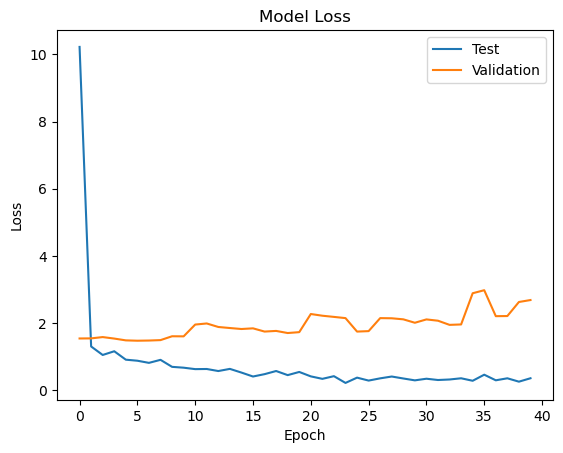

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# **Prediction**

99.84954595565796% Confidence 
This is : no_tumor


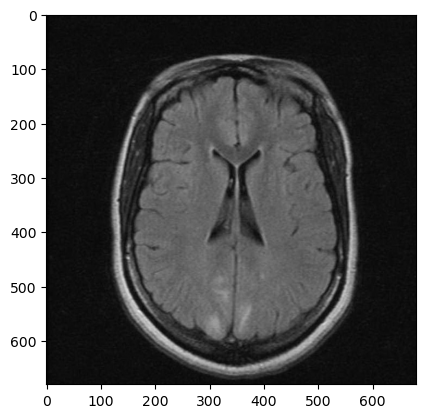

In [82]:
img = Image.open('C:/Users/REKHA/Desktop/Mini Project NFCD/Brain Tumor Detection and Classification/Dataset/Training/no_tumor/image (37).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence ')
print('This is : '+ names(classification))